# IMPORTING LIBRARIES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Wine_clust.csv') # Loading the dataset

In [4]:
data.shape #checking the shape , find the no of rows and columns

(178, 13)

In [5]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
data.isna().sum() #checking for null values

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [8]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


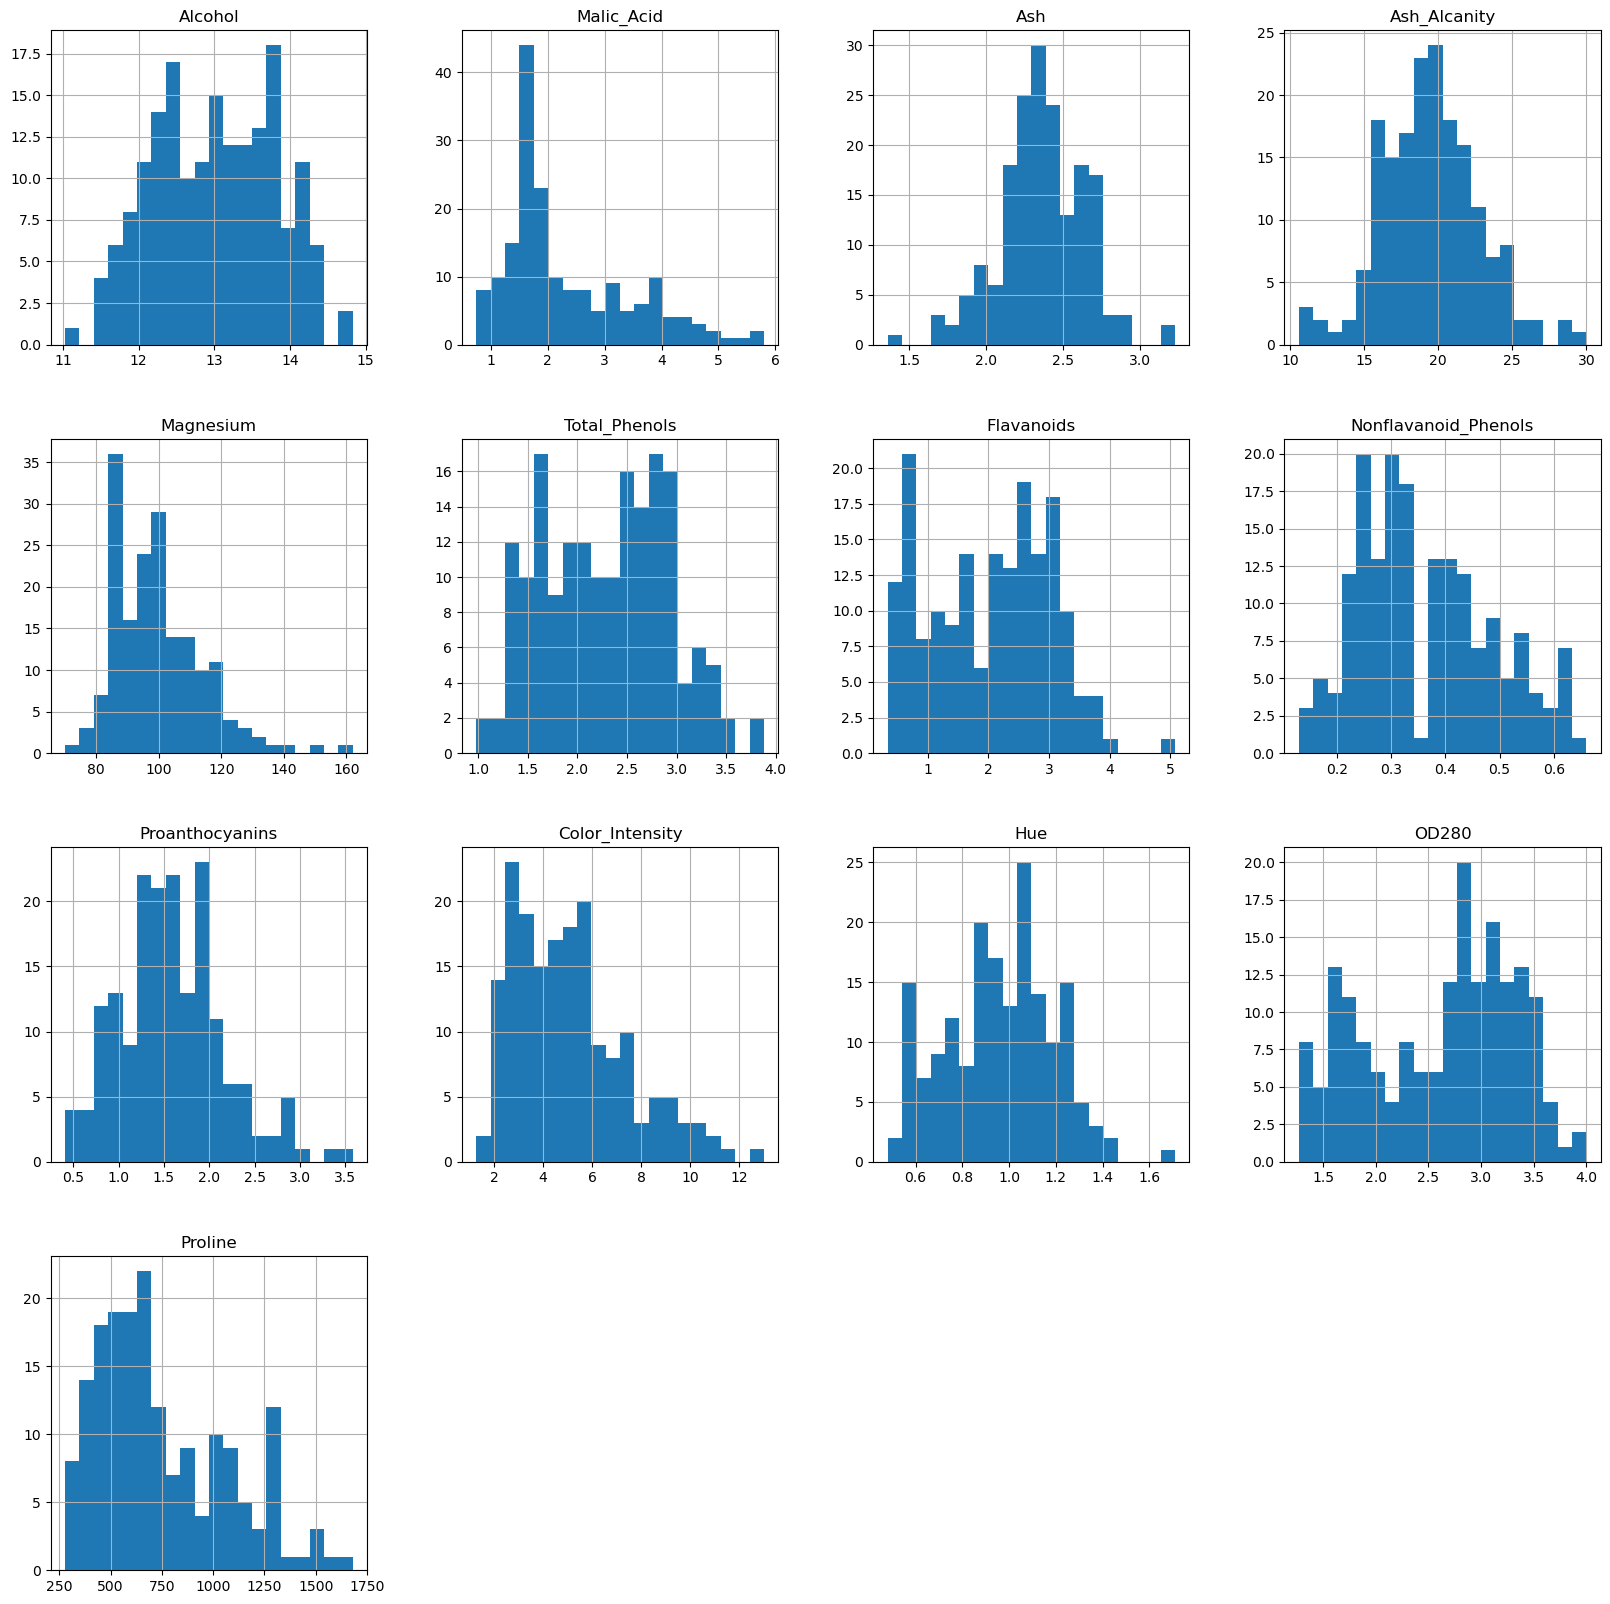

In [9]:
plt.rcParams["figure.figsize"] = (20, 20)
data.hist(bins=20)
plt.show()

In [10]:
data.shape

(178, 13)

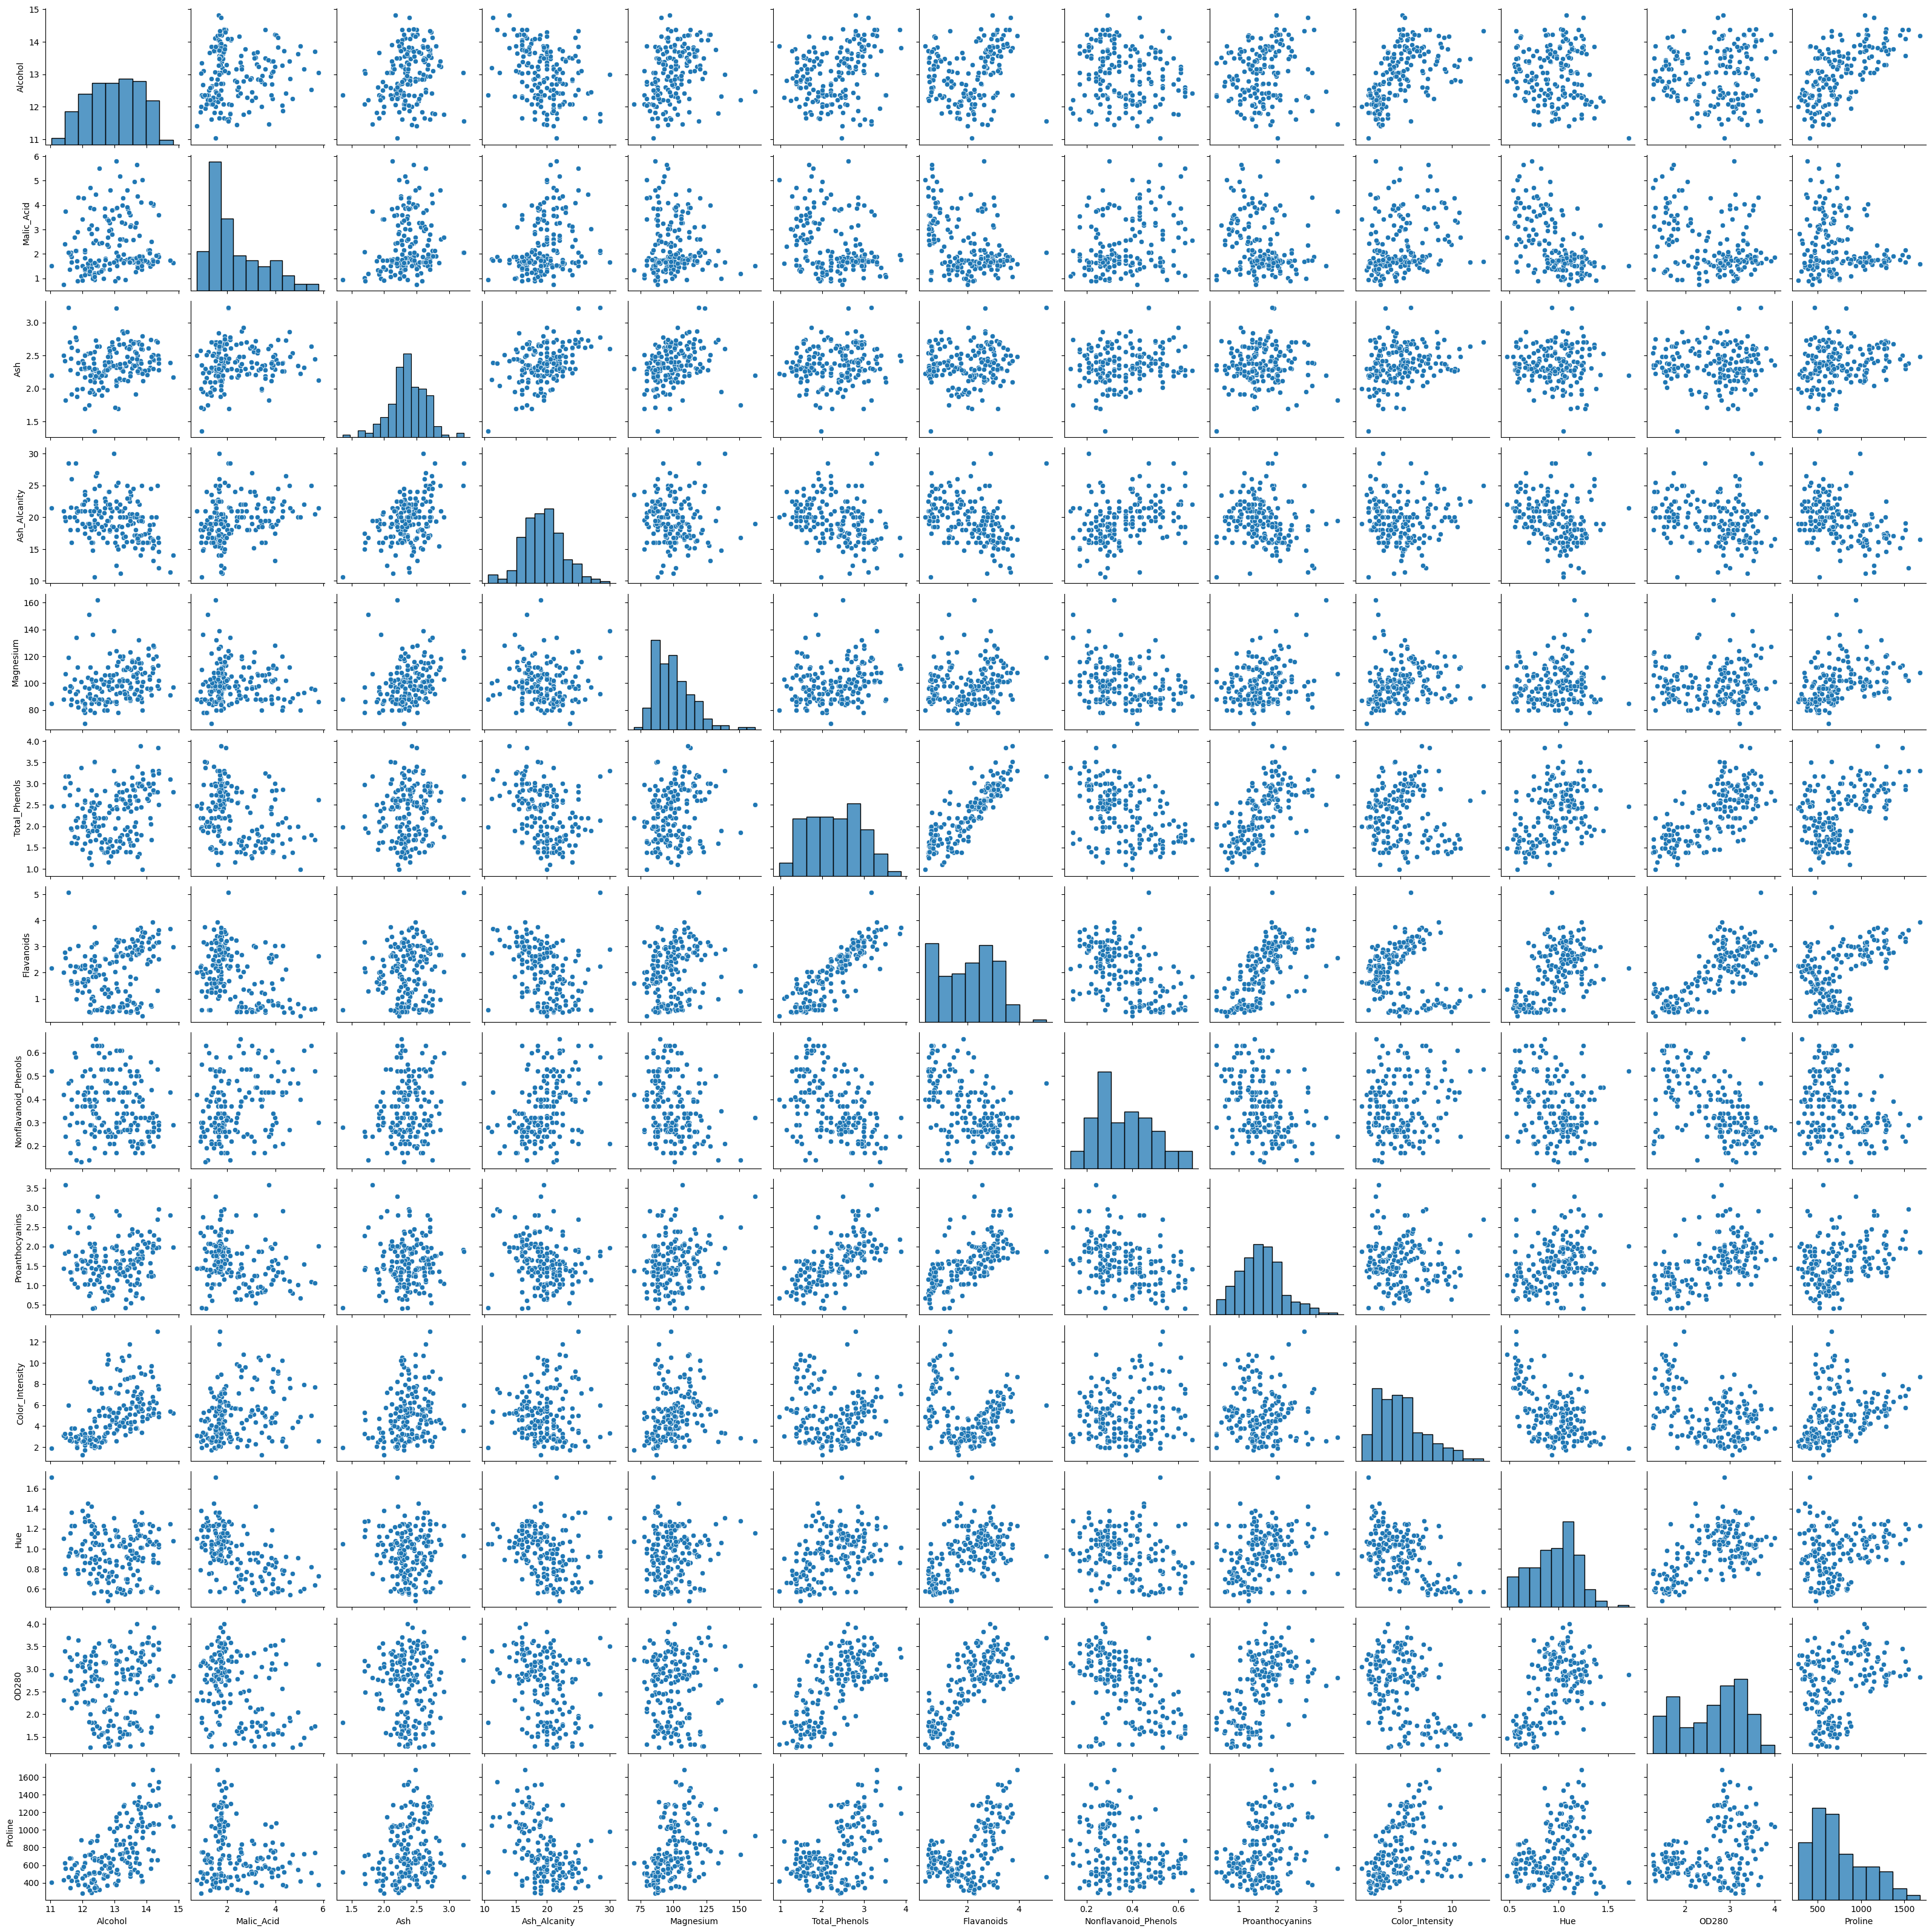

In [11]:
sns.pairplot(data)
plt.show()

Visualizing with Heatmap

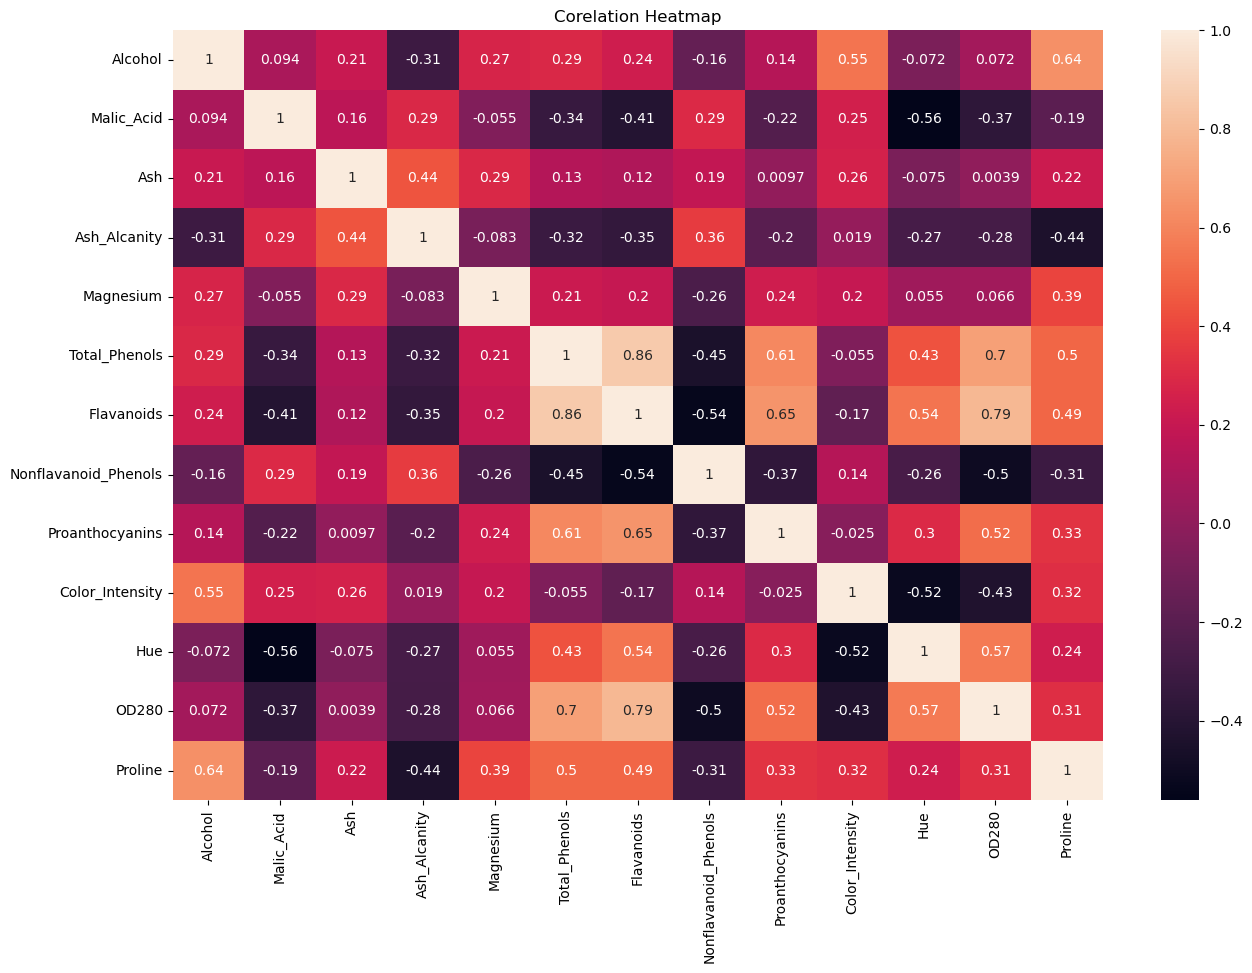

In [12]:
plt.figure(figsize= (15, 10))
sns.heatmap(data.corr(),annot=True)
plt.title("Corelation Heatmap")
plt.show()

In [13]:
#data= data.drop('Proline',axis=1)

In [14]:
#data.columns

# KMEANS CLUSTERING

In [15]:
#KMeans
from sklearn.cluster import KMeans


In [16]:
wcss =[]
for i in range(1,13):
    kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [17]:
wcss

[17592296.383508474,
 4543749.614531862,
 2370689.686782968,
 1337029.4929415903,
 916379.187153917,
 647326.0020260846,
 412303.8282508013,
 323223.24705426674,
 270954.9292415375,
 217887.378560333,
 186382.92305063075,
 166245.77997591507]

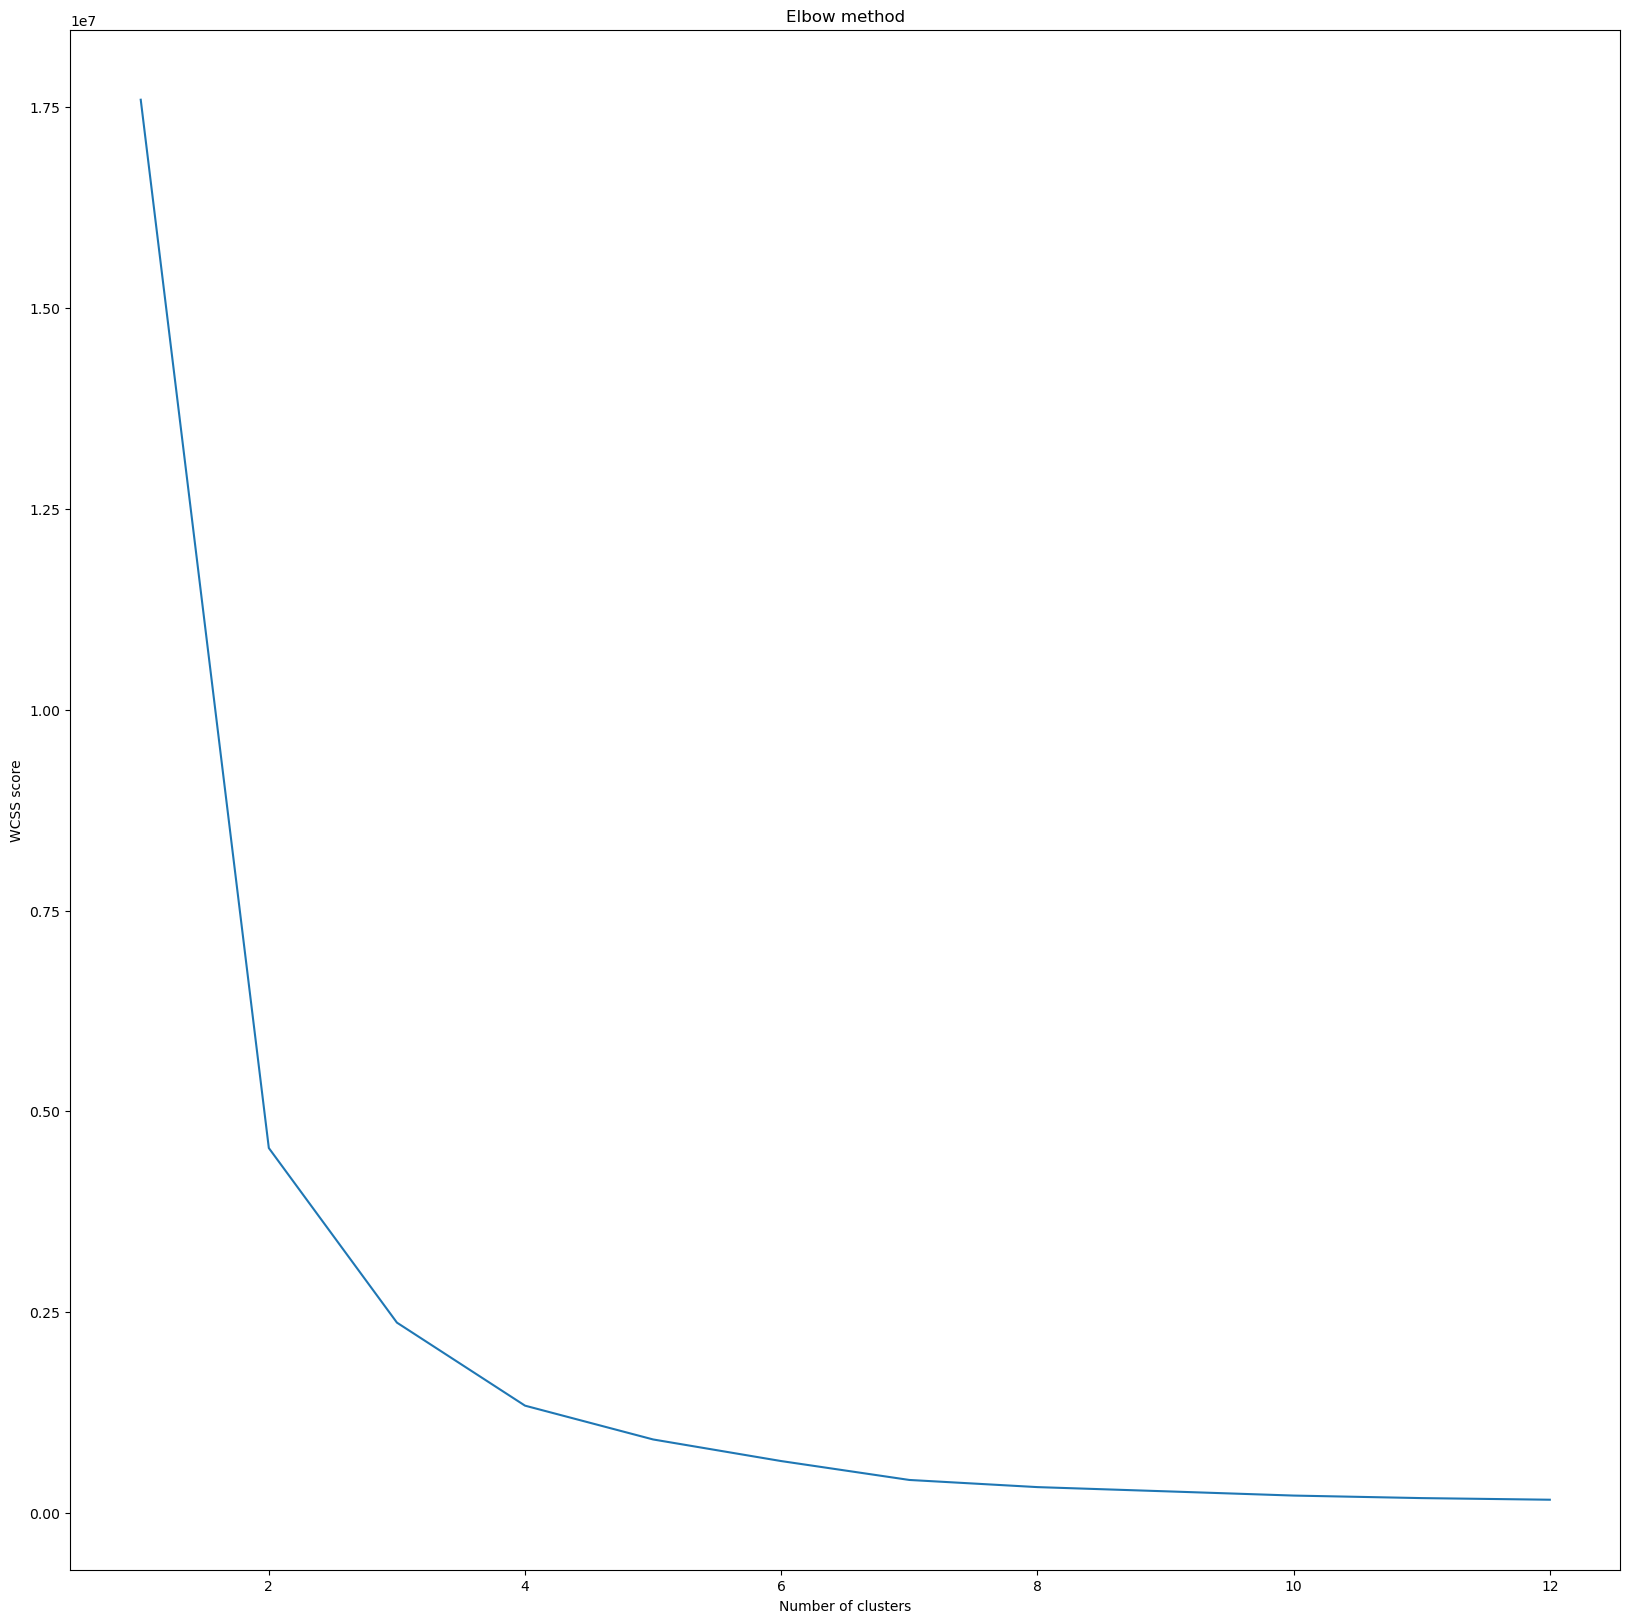

In [18]:
plt.plot(range(1,13),wcss) #plotting the figure 
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS score')
plt.show()

In [19]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


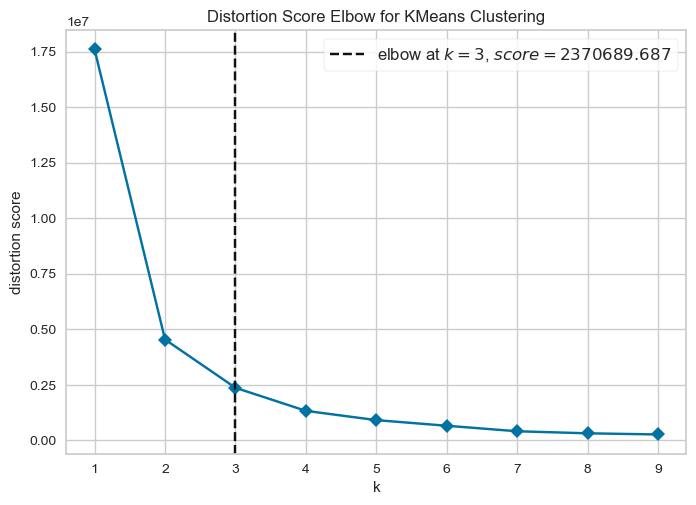

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
from yellowbrick.cluster import KElbowVisualizer #Using this method for better understanding of the value of k
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10),timings = False)
visualizer.fit(data)
visualizer.show()

BUILDING KMEANS MODEL 

In [21]:

kmeans = KMeans(n_clusters = 3,init = 'k-means++',random_state=42)
y_kmeans=kmeans.fit_predict(data)

In [22]:
y_kmeans

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 2,
       0, 0, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2,
       2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0])

FINDING OUT THE SILHOUETTE SCORE

In [23]:
from sklearn.metrics import silhouette_score
for i in range(2,13):
    kmeans = KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(data)
    score=silhouette_score(data,kmeans.labels_)
    print("For cluster:{},the silhouette score is: {}".format(i,score))

For cluster:2,the silhouette score is: 0.6568536504294317
For cluster:3,the silhouette score is: 0.571138193786884
For cluster:4,the silhouette score is: 0.5605941060060623
For cluster:5,the silhouette score is: 0.5489993239795681
For cluster:6,the silhouette score is: 0.5656413100386375
For cluster:7,the silhouette score is: 0.5616196384056887
For cluster:8,the silhouette score is: 0.540682474785761
For cluster:9,the silhouette score is: 0.5315120901342508
For cluster:10,the silhouette score is: 0.5176135175013704
For cluster:11,the silhouette score is: 0.5177440324545124
For cluster:12,the silhouette score is: 0.5148763683258848


From silhouette method we can see a gradual fall in the graph after 3 clusters, hence we are taking K=3. 
Since the value 2 is the starting point of the graph, we cannot consider it as the optimal point here. Also, the other methods used to find the optimal clusters, gives us a value of 3.

In [25]:
from sklearn.decomposition import PCA  #Implementing PCA
pca = PCA()
x = pca.fit_transform(data)

In [26]:
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(x)
unique_labels=np.unique(label)

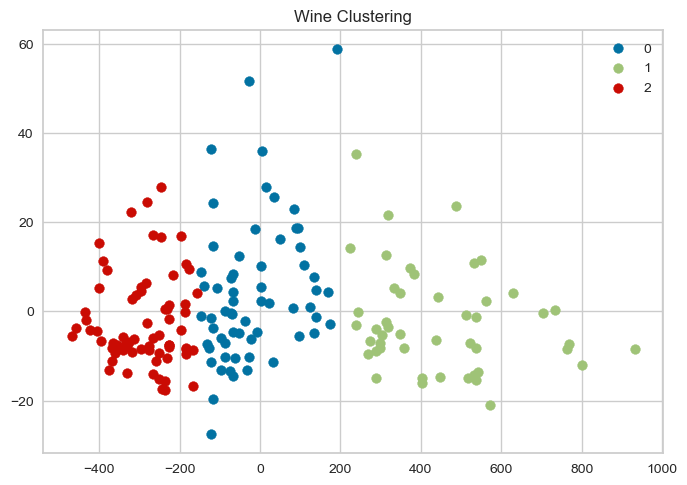

In [27]:
for i in unique_labels:
    plt.scatter(x[label==i,0],x[label==i,1],label=i)
    
plt.legend()
plt.title('Wine Clustering')
plt.show()

IMPLEMENTING PCA ON THE DATASET

In [28]:
#pca
data.shape

(178, 13)

In [29]:
#scaling the data
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()

In [30]:
scaled_data = sc.fit_transform(data)

In [31]:
scaled_data

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [32]:
scaled_data = pd.DataFrame(scaled_data,columns = data.columns)

In [33]:
scaled_data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.122697e-17,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components = 10)#specifying components
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

In [36]:
x_pca.shape

(178, 10)

In [37]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019])

In [38]:
np.sum(pca.explained_variance_ratio_)

0.9616971684450644

In [39]:
pca1 = PCA(n_components = 0.97)#specifying variance
pca1.fit(scaled_data)
x_pca1 = pca1.transform(scaled_data)

In [40]:
x_pca1.shape

(178, 11)

In [41]:
pca1.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836])

In [42]:
np.sum(pca1.explained_variance_ratio_)

0.9790655253449635

# Agglomerative HC

In [43]:
import scipy.cluster.hierarchy as sch

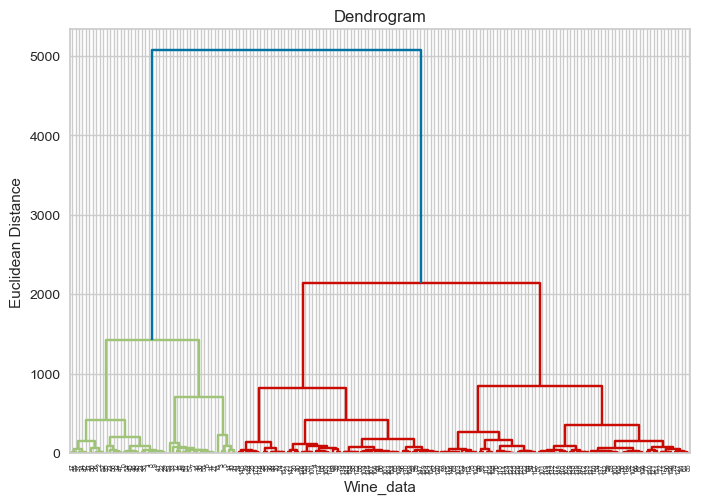

In [44]:
dendrogram = sch.dendrogram(sch.linkage(data,method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Wine_data')
plt.ylabel('Euclidean Distance')
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
hc1 = AgglomerativeClustering(n_clusters = 2,affinity ='euclidean',linkage='ward')

In [47]:
y_hc1 = hc1.fit_predict(data)

SILHOUETTE SCORE FOR AGGLOMERATIVE CLUSTERING

In [48]:
#silhoutte score
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(data,y_hc1)
print(silhouette_avg)

0.6587292996216912


# DBSCAN CLUSTERING

Density-Based Spatial Clustering of Applications with Noise (DBSCAN) is a base algorithm for density-based clustering.
It can discover clusters of different shapes and sizes from a large amount of data, which is containing noise and outliers

In [49]:
data = pd.read_csv('Wine_clust.csv')

In [50]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [53]:
from sklearn import preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data)
  
# Normalizing the data
X_normalized = preprocessing.normalize(X_scaled)

  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)
X_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.195143,0.662421,0.067958,0.067211,-0.074141,-0.219493,-0.317320,0.283785,-0.207148,0.254500,-0.310162,-0.274185,-0.004889
174,0.151189,0.432907,0.127125,0.322553,0.048596,-0.243124,-0.393599,0.168279,-0.097132,0.297199,-0.346151,-0.455228,0.003032
175,0.076851,0.402951,-0.089922,0.035026,0.328507,-0.260934,-0.310533,0.126817,-0.097479,0.513690,-0.372322,-0.343065,0.064799
176,0.054369,0.059166,0.003308,0.039409,0.369612,-0.268602,-0.351997,0.352066,-0.059595,0.476803,-0.407509,-0.363970,0.077045


In [54]:
X_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.379613,-0.140548,0.058007,-0.292368,0.478426,0.202228,0.258678,-0.164873,0.306189,0.062923,0.090535,0.461931,0.253226
1,0.072771,-0.147561,-0.244647,-0.735967,0.005361,0.168017,0.216764,-0.242497,-0.160948,-0.086667,0.119975,0.328989,0.285198
2,0.059268,0.006391,0.333952,-0.080900,0.026599,0.243539,0.365922,-0.150039,0.643007,0.080985,0.095822,0.237395,0.419993
3,0.348418,-0.071435,0.100501,-0.166686,0.191747,0.513178,0.302069,-0.202243,0.212599,0.244301,-0.088064,0.243890,0.480866
4,0.110835,0.085345,0.689824,0.169399,0.480516,0.303230,0.248639,0.085008,0.150455,-0.119672,0.135752,0.168520,-0.014196
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.195143,0.662421,0.067958,0.067211,-0.074141,-0.219493,-0.317320,0.283785,-0.207148,0.254500,-0.310162,-0.274185,-0.004889
174,0.151189,0.432907,0.127125,0.322553,0.048596,-0.243124,-0.393599,0.168279,-0.097132,0.297199,-0.346151,-0.455228,0.003032
175,0.076851,0.402951,-0.089922,0.035026,0.328507,-0.260934,-0.310533,0.126817,-0.097479,0.513690,-0.372322,-0.343065,0.064799
176,0.054369,0.059166,0.003308,0.039409,0.369612,-0.268602,-0.351997,0.352066,-0.059595,0.476803,-0.407509,-0.363970,0.077045


In the next line of code,
we are reducing the dimensionality of the data , here we are specifying variance as 0.75

In [55]:
pca = PCA(n_components = 0.75)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)


In [56]:
X_principal

,0,1,2,3,4
0,-0.832433,-0.318834,-0.013979,0.022322,0.157929
1,-0.639443,0.091947,-0.576623,-0.060029,-0.018764
2,-0.756882,-0.243317,0.328412,0.163100,-0.127794
3,-0.805447,-0.510057,-0.006183,0.143669,-0.062148
4,-0.373903,-0.311604,0.795363,-0.085997,0.169561
...,...,...,...,...,...
173,0.712087,-0.598440,-0.048638,0.255631,-0.222897
174,0.765670,-0.638731,0.074859,0.141316,0.008065
175,0.583558,-0.736844,-0.206111,0.166687,0.207912
176,0.597059,-0.692888,-0.128594,-0.110257,0.175675


In [58]:
#Building the clustering model
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 0.385, min_samples = 3).fit(X_principal)

In [59]:
y_dbscan=db_default.fit_predict(X_principal)

In [60]:
y_dbscan

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1, -1,  2,  1,  1,  1, -1, -1,  1,
       -1, -1, -1,  0, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  0, -1,  1, -1,  1,  1,  1,  1, -1, -1,
        1,  1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2, -1,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2], dtype=int64)

SILHOUETTE SCORE FOR DBSCAN CLUSTERING 

In [61]:
from sklearn.metrics import silhouette_score
silhoutte_avg = silhouette_score(X_principal,y_dbscan)
print (silhoutte_avg)

0.32664052424774254


In the next line of code,
we are reducing the dimensionality of the data , here we are specifying the number of components as 2

In [62]:
#Reducing the dimensionality of the data to make it visualizable
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)

In [63]:
X_principal

,0,1
0,-0.832433,-0.318834
1,-0.639443,0.091947
2,-0.756882,-0.243317
3,-0.805447,-0.510057
4,-0.373903,-0.311604
...,...,...
173,0.712087,-0.598440
174,0.765670,-0.638731
175,0.583558,-0.736844
176,0.597059,-0.692888


In [65]:
#Building the clustering model
from sklearn.cluster import DBSCAN
db_default = DBSCAN(eps = 0.140, min_samples = 3).fit(X_principal)

In [66]:
y_dbscan=db_default.fit_predict(X_principal)

In [67]:
y_dbscan

array([ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  1,  2,  4,  3,  3,  1,  3,  3,  1,
        6,  3,  4,  3,  1,  0,  3,  1,  1,  4,  3,  3,  1, -1,  1,  5,  3,
        1,  1,  1,  4,  1,  4,  4,  4,  1,  1,  0,  6,  1,  3,  3,  1,  1,
        1,  1,  1,  4,  1,  4,  1,  3,  3,  1,  2,  1,  1,  1,  1,  1,  4,
        1,  3,  0,  2,  6,  3,  1,  1,  2,  1,  4, -1,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5, -1, -1,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,
        5,  5,  5,  5,  5,  5,  5,  5], dtype=int64)

SILHOUETTE SCORE FOR DBSCAN CLUSTERING

In [68]:
from sklearn.metrics import silhouette_score
silhoutte_avg = silhouette_score(X_principal,y_dbscan)
print (silhoutte_avg)

0.44285593735760875


Hence for DBSCAN CLUSTERING we conclude that we get better Silhouette score after specifying the number of components as 2